c:\Users\yugen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


shape of X_train: (2000, 100, 100, 3)
shape of y train : (2000, 1)
shape of X_test: (400, 100, 100, 3)
shape of Y_test: (400, 1)


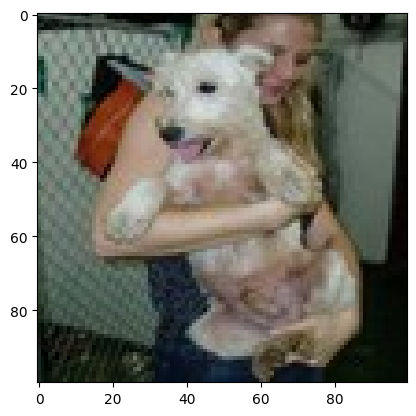

c:\Users\yugen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - accuracy: 0.5230 - loss: 0.7201 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.4930 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.5150 - loss: 0.6907 - val_accuracy: 0.5900 - val_loss: 0.6793
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - accuracy: 0.5785 - loss: 0.6775 - val_accuracy: 0.6000 - val_loss: 0.6659
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.5505 - loss: 0.6874 - val_accuracy: 0.5000 - val_loss: 0.6794
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.5575 - loss: 0.6828 - val_accuracy: 0.5975 - val_loss: 0.6662
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.5755 - loss: 0.6805 - val_accuracy: 0.6325 - val_loss: 0.6598
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.5700 - loss: 0.6799 - val_accu

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train = np.loadtxt('input.csv', delimiter = ',')
y_train = np.loadtxt('labels.csv', delimiter = ',')
X_test = np.loadtxt('input_test.csv', delimiter = ',')
y_test = np.loadtxt('labels_test.csv', delimiter = ',')
X_train = X_train.reshape(len(X_train), 100, 100, 3)
y_train= y_train.reshape(len(y_train), 1)

X_test = X_test.reshape(len(X_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

#data augmentation to improve training

datagen = ImageDataGenerator(
    rotation_range  = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    zoom_range =0.2
)

print("shape of X_train:", X_train.shape)
print("shape of y train :", y_train.shape)
print("shape of X_test:" , X_test.shape)
print("shape of Y_test:", y_test.shape)
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model = Sequential()
model.add(Conv2D (32,(3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))


model.add(Conv2D (64,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D (128,(3,3), activation = 'relu' ))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense (128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          epochs = 30, 
          validation_data =(X_test, y_test),
          verbose= 1)
idx2 = random.randint(0,len(y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if( y_pred == 0):
    pred = 'dog'

else: 
    pred = 'cat'

print("our model says it is a :" ,pred)

model.save('model.h5')
print('saved model to model.js')